In [1]:
library(olsrr)
library(bootstrap)
library(Rmisc)


Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers


Loading required package: lattice

Loading required package: plyr



In [2]:
original_dataset <- read.csv("Dataset.txt", header = T, sep = "")
attach(original_dataset)


Call:
lm(formula = Orders ~ PrintRuns)

Residuals:
    Min      1Q  Median      3Q     Max 
-892.50 -208.11  -29.97  193.39 1558.01 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -212.6631   258.8641  -0.822 0.416755    
PrintRuns      0.4903     0.1222   4.012 0.000291 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 570.1 on 36 degrees of freedom
Multiple R-squared:  0.3089,	Adjusted R-squared:  0.2897 
F-statistic: 16.09 on 1 and 36 DF,  p-value: 0.0002914


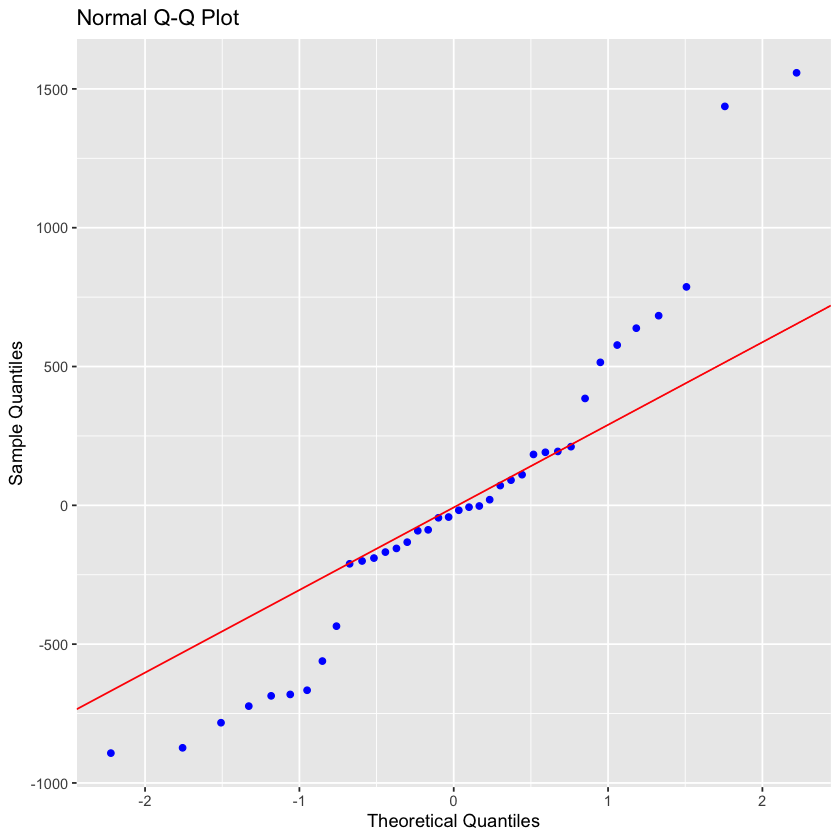

In [3]:
linearModel <- lm(Orders ~ PrintRuns)

summary(linearModel)
ols_plot_resid_qq(linearModel)

Residual Bootstrap

In [4]:
bootstrappedResiduals <- function(x, original_dataset, fit)
{
  lm(newY ~ PrintRuns, data = data.frame(newY = linearModel$fitted.values + linearModel$residuals[x], original_dataset))$coefficients
}  

bootstrappedResidualsReg <- bootstrap(1:38, 100, theta=bootstrappedResiduals, original_dataset, fit)

bootstrappedResidualsReg

beta_0_boot_res_hat <- mean(bootstrappedResidualsReg$thetastar[1,])
beta_1_boot_res_hat <- mean(bootstrappedResidualsReg$thetastar[2,])

$thetastar
                    [,1]         [,2]         [,3]         [,4]      [,5]
(Intercept) -765.7157823 -441.7271321 -702.3386603 -369.9165284 -156.6424
PrintRuns      0.7449799    0.5408748    0.7067679    0.5518085    0.4282
                    [,6]         [,7]        [,8]         [,9]        [,10]
(Intercept) -417.3354489 -317.8011550 -419.008479 -305.3962322 -336.3631576
PrintRuns      0.5903833    0.5443609    0.602945    0.5348593    0.4774144
                   [,11]        [,12]       [,13]        [,14]        [,15]
(Intercept) -598.2961934 -668.1905889 -341.953166 -611.2164537 -316.4786808
PrintRuns      0.6969681    0.6370777    0.558743    0.6785753    0.5210427
                   [,16]        [,17]        [,18]        [,19]        [,20]
(Intercept) -252.1822508 -423.7669126 -152.5809435 -277.9417760 -255.8442836
PrintRuns      0.4320018    0.5681518    0.4909838    0.5332793    0.5336327
                 [,21]        [,22]        [,23]       [,24]       [,25]
(Interc

Paired BootStrap

In [5]:
bootstrappedPairs <- function(x, original_dataset)
{
  lm(Orders ~ PrintRuns, original_dataset[x, ])$coefficients
}

bootstrappedPairsReg <- bootstrap(1:38, 100, theta=bootstrappedPairs, original_dataset)

bootstrappedPairsReg

beta_0_boot_pairs_hat <- mean(bootstrappedPairsReg$thetastar[1,])
beta_1_boot_pairs_hat <- mean(bootstrappedPairsReg$thetastar[2,])

$thetastar
                   [,1]         [,2]         [,3]         [,4]         [,5]
(Intercept) -365.760040 -219.2977597 -284.6429921 -108.2569634 -194.6083678
PrintRuns      0.595467    0.4907611    0.4998507    0.4365435    0.5059972
                   [,6]         [,7]         [,8]         [,9]        [,10]
(Intercept) -56.1065910 -159.9966913 -259.5193926 -136.0763101 -287.7614712
PrintRuns     0.4248416    0.4698278    0.5593444    0.3992845    0.5217255
                   [,11]        [,12]        [,13]        [,14]        [,15]
(Intercept) -193.2091107 -432.4355644 -240.9517741 -158.6744995 -114.9239529
PrintRuns      0.4741375    0.6909157    0.5503365    0.4230182    0.4060546
                  [,16]        [,17]        [,18]        [,19]       [,20]
(Intercept) -144.109814 -180.7074886 -139.4936506 -293.5231592 104.5120092
PrintRuns      0.434536    0.4685815    0.3848025    0.5128153   0.3455663
                   [,21]        [,22]        [,23]        [,24]       [,25]
(

Original estimators

In [6]:
linearModel$coefficients

(Intercept)    PrintRuns 
-212.6630961    0.4903247

Estimators of beta for Residual Bootstrap

In [7]:
beta_0_boot_res_hat
beta_1_boot_res_hat

[1] -232.5136

[1] 0.4995902

Estimators of beta for Paired Bootstrap

In [8]:
beta_0_boot_pairs_hat
beta_1_boot_pairs_hat

[1] -215.051

[1] 0.4919927

Histograms \n 
Histograms for Residual Boostrap

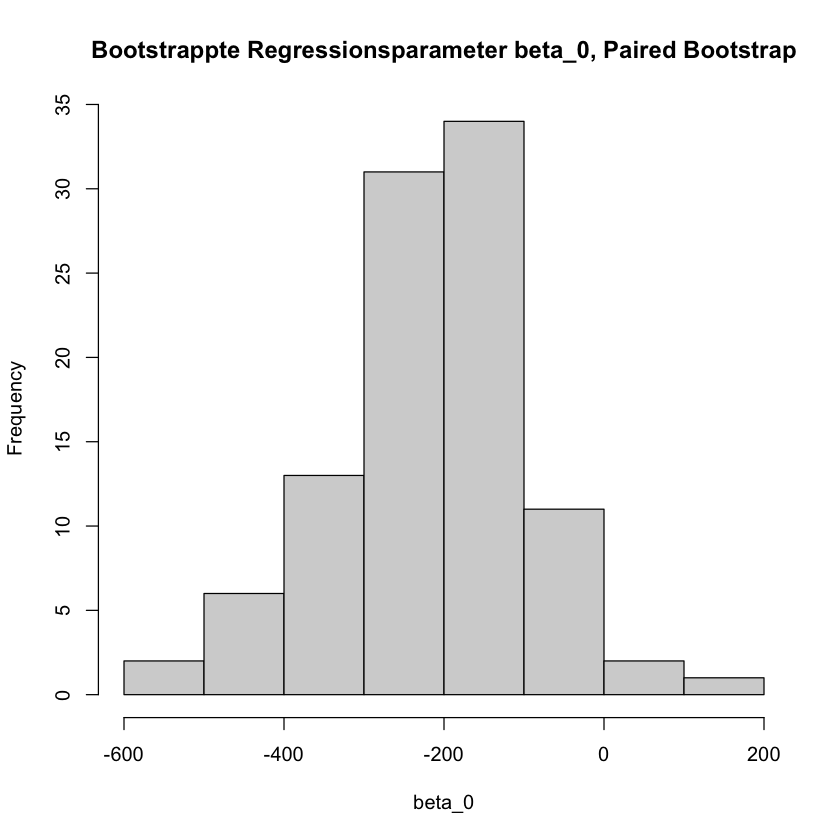

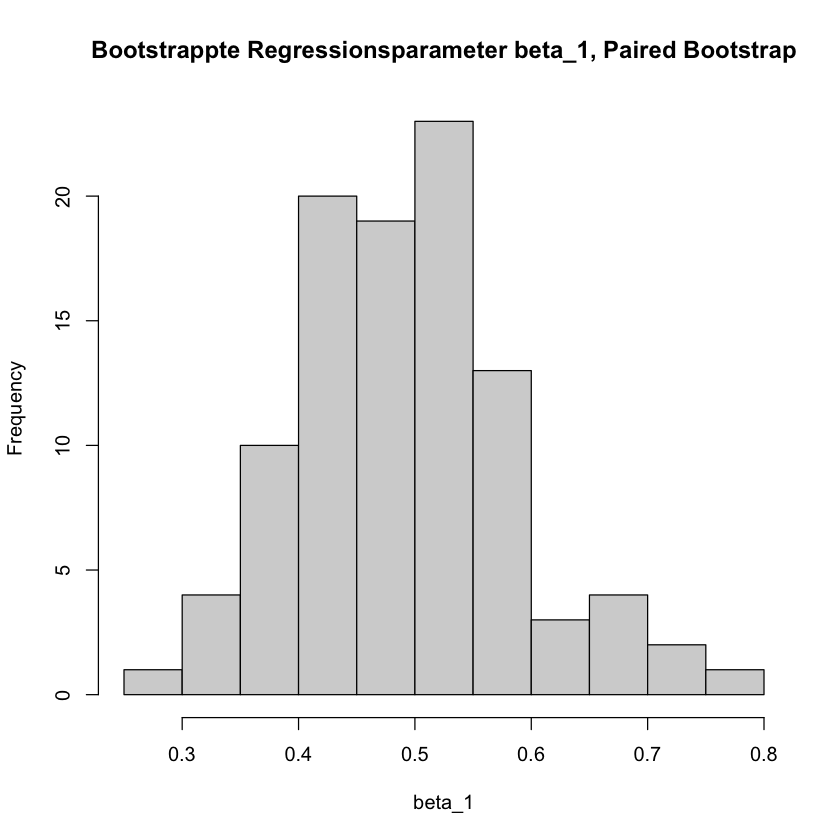

In [9]:
hist(bootstrappedPairsReg$thetastar[1,], main="Bootstrappte Regressionsparameter beta_0, Paired Bootstrap", xlab ="beta_0")
hist(bootstrappedPairsReg$thetastar[2,], main="Bootstrappte Regressionsparameter beta_1, Paired Bootstrap", xlab ="beta_1")

Histograms for Paired Boostrap

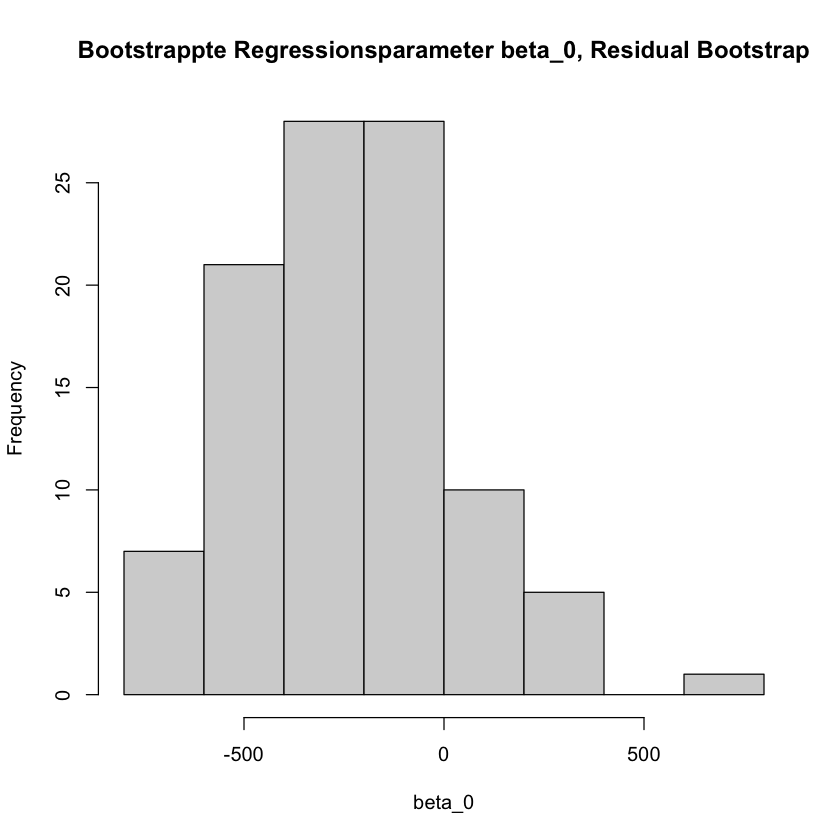

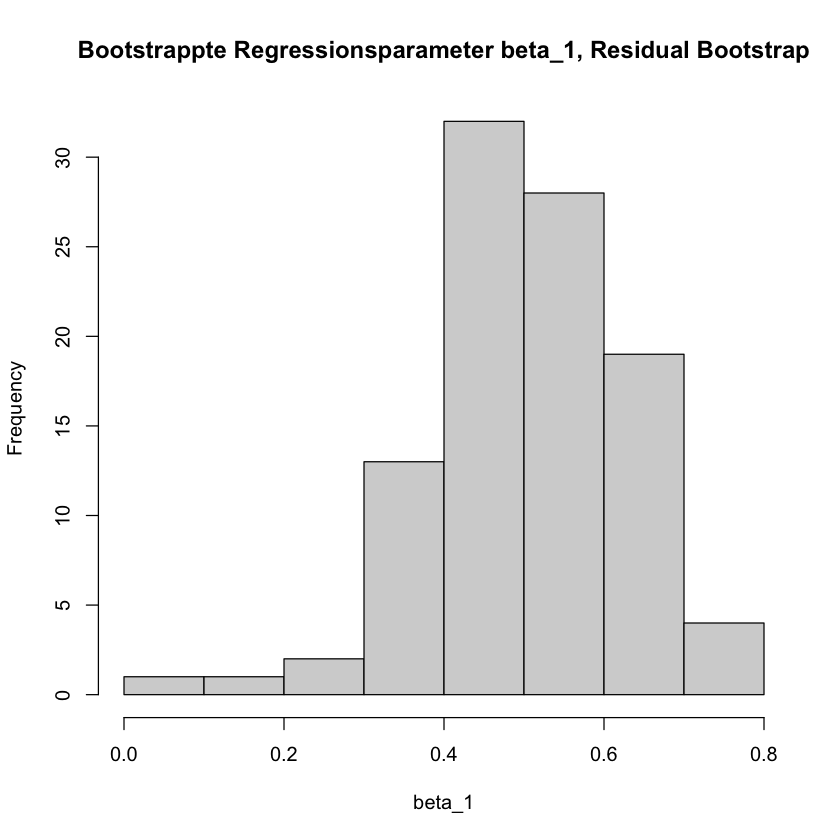

In [10]:
hist(bootstrappedResidualsReg$thetastar[1,], main="Bootstrappte Regressionsparameter beta_0, Residual Bootstrap", xlab ="beta_0")
hist(bootstrappedResidualsReg$thetastar[2,], main="Bootstrappte Regressionsparameter beta_1, Residual Bootstrap", xlab ="beta_1")

Confidence intervals
CI for Residual Bootstrap

In [11]:
CI(bootstrappedResidualsReg$thetastar[1,], ci=0.95)
CI(bootstrappedResidualsReg$thetastar[2,], ci=0.95)

upper      mean     lower 
-179.3801 -232.5136 -285.6472

upper      mean     lower 
0.5244395 0.4995902 0.4747408

CI for Paired Bootstrap

In [12]:
CI(bootstrappedPairsReg$thetastar[1,], ci=0.95)
CI(bootstrappedPairsReg$thetastar[2,], ci=0.95)

upper     mean    lower 
-191.758 -215.051 -238.344

upper      mean     lower 
0.5106328 0.4919927 0.4733526